<a href="https://colab.research.google.com/github/jimjyothish-dotcom/Flight-Metrics-Visualization-and-Strategy/blob/main/Project_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd . read_csv ( "/content/airlines_flights_data.csv" )
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/airlines_flights_data.csv'

**Cleaning the data**

In [ ]:
data . drop ( columns = "index" , inplace = True )
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**Data Exploration & insights**

 Head

In [ ]:
data . head ()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Tail**

In [ ]:
data . tail ()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


**Data Information**

In [ ]:
data . info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


**Data Description**

In [ ]:
data . describe ()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


**NULL**

In [ ]:
data . isnull () . sum ()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


**Duplicate**

In [ ]:
data [ data . duplicated ()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


**DATA VISUALISATION**

1.Price Distribution across Airlines

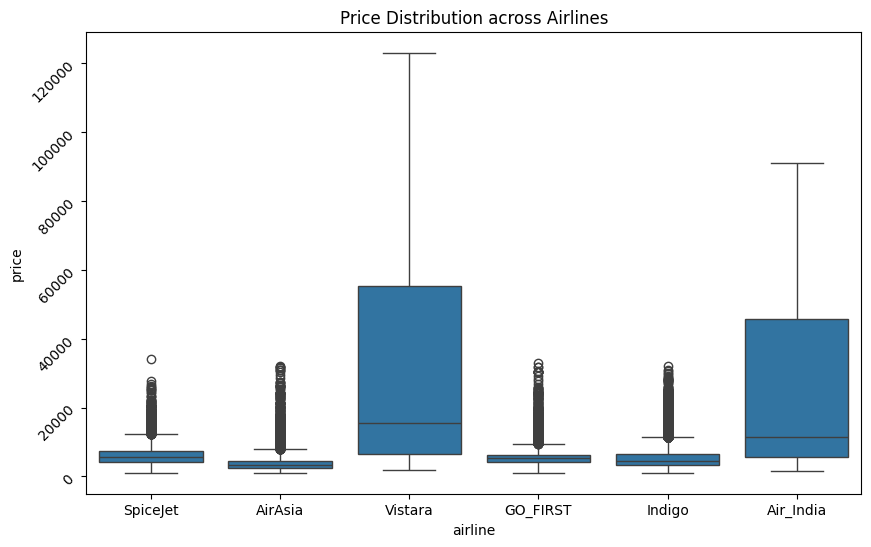

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='airline',y='price')
plt.yticks(rotation=45)
plt.title('Price Distribution across Airlines')
plt.show()

2.Average Price: Economy vs. Business Class

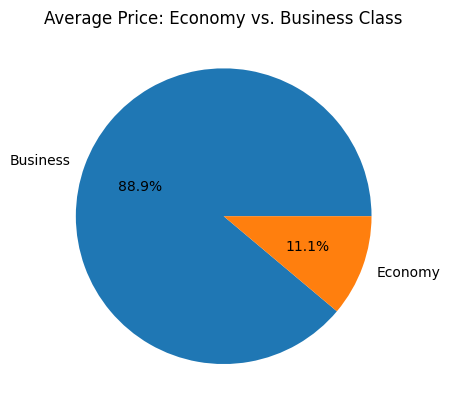

In [ ]:
q2=data.groupby('class')['price'].mean()
values= q2.values
label= q2.index
plt.pie(values,labels=label,autopct='%1.1f%%')
plt.title("Average Price: Economy vs. Business Class")
plt.show()

3.Busiest Source & Destination Cities

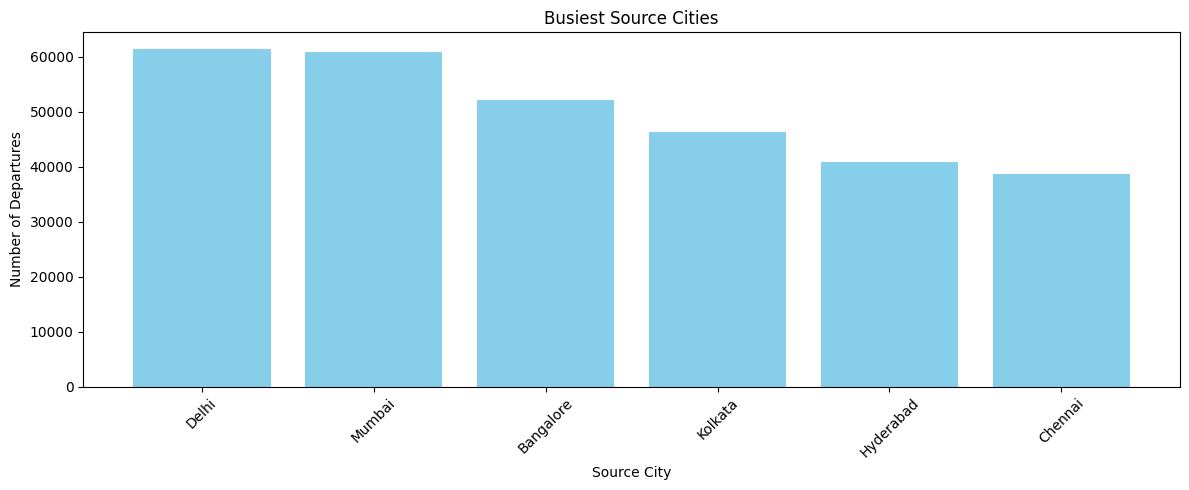

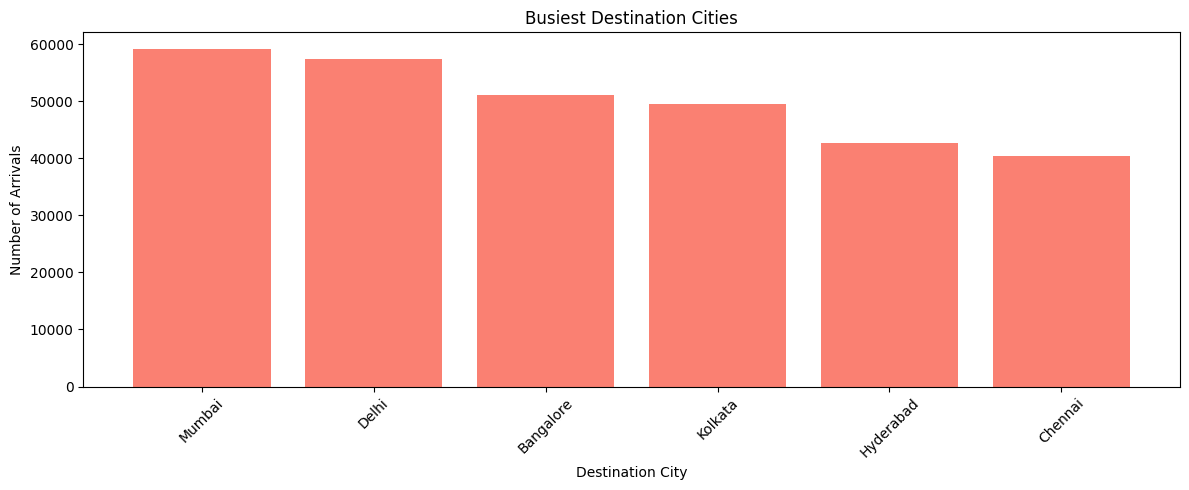

In [ ]:
source_counts = data['source_city'].value_counts()
destination_counts = data['destination_city'].value_counts()
plt.figure(figsize=(12,5))
plt.bar(source_counts.index, source_counts.values, color='skyblue')
plt.title("Busiest Source Cities")
plt.xlabel("Source City")
plt.ylabel("Number of Departures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,5))
plt.bar(destination_counts.index, destination_counts.values, color='salmon')
plt.title("Busiest Destination Cities")
plt.xlabel("Destination City")
plt.ylabel("Number of Arrivals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.Days Left vs. Ticket Price Trend

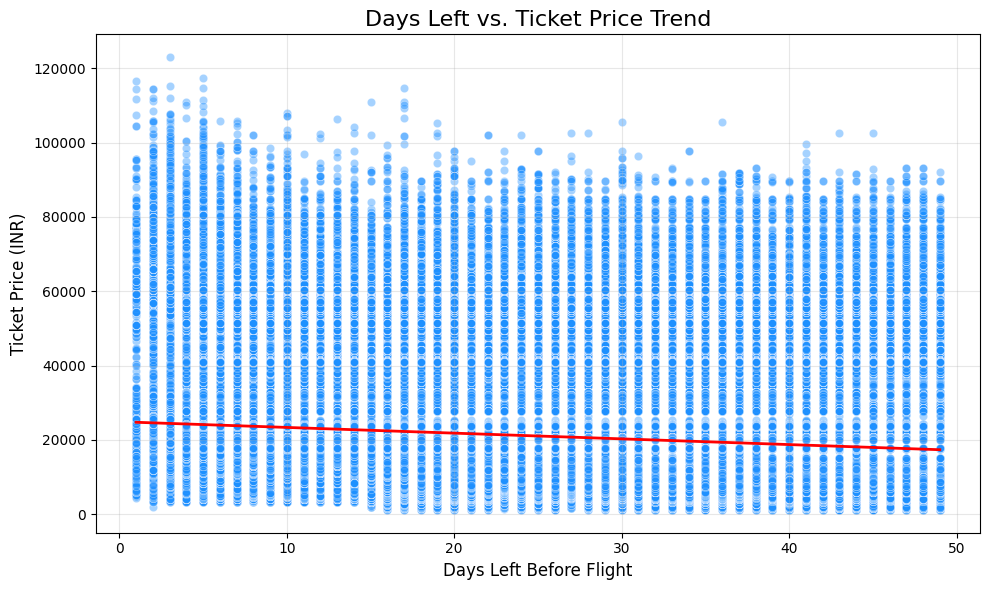

In [ ]:
data.columns = data.columns.str.strip()
plt.figure(figsize=(10,6))
sns.scatterplot(x="days_left", y="price", data=data, alpha=0.4, color="dodgerblue")
sns.regplot(x="days_left", y="price", data=data, scatter=False, color="red", line_kws={'color':'red', 'lw':2})
plt.title("Days Left vs. Ticket Price Trend", fontsize=16)
plt.xlabel("Days Left Before Flight", fontsize=12)
plt.ylabel("Ticket Price (INR)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

5.Stops vs. Price Comparison

/tmp/ipython-input-41200959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="stops", y="price", data=data, palette="Set2")


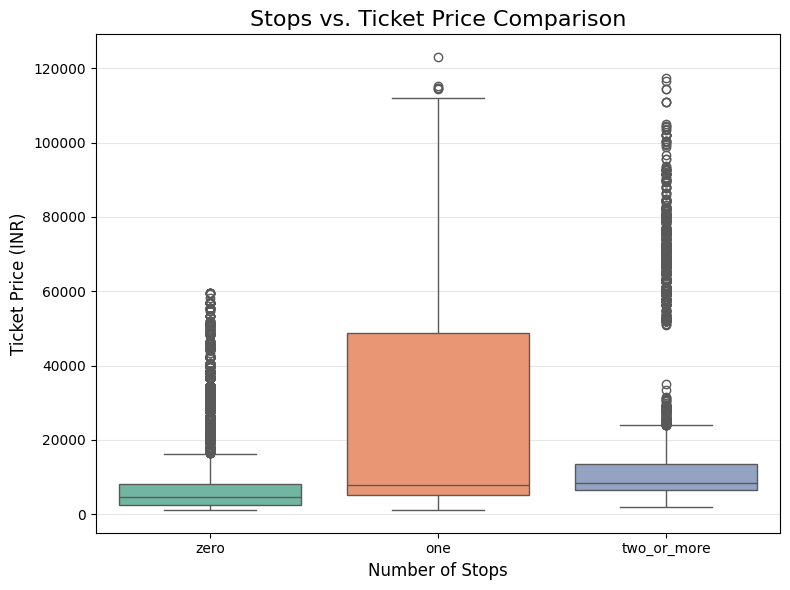

In [ ]:
data.columns = data.columns.str.strip()

# Plot Stops vs Price as a boxplot

plt.figure(figsize=(8,6))
sns.boxplot(x="stops", y="price", data=data, palette="Set2")
plt.title("Stops vs. Ticket Price Comparison", fontsize=16)
plt.xlabel("Number of Stops", fontsize=12)
plt.ylabel("Ticket Price (INR)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

6.Duration Impact on Ticket Pricing

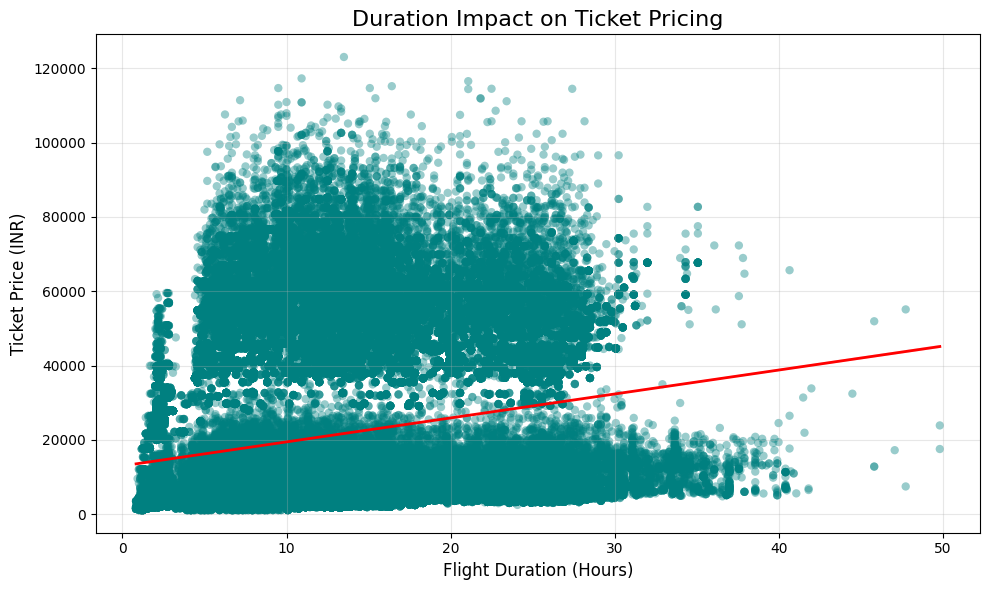

In [ ]:
data.columns = data.columns.str.strip()

# Plot Duration vs Price

plt.figure(figsize=(10,6))
sns.scatterplot(x="duration", y="price", data=data, alpha=0.4, color="teal", edgecolor='none')
sns.regplot(x="duration", y="price", data=data, scatter=False, color="red", line_kws={'color':'red', 'lw':2})
plt.title("Duration Impact on Ticket Pricing", fontsize=16)
plt.xlabel("Flight Duration (Hours)", fontsize=12)
plt.ylabel("Ticket Price (INR)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**SQL QUERIES**

In [ ]:
! pip install pandasql
import pandasql as ps

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=1bafbc37ae24567b7f96fad8f9e9dad15dba432622abea7f7c279ac123049055
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


1. Find the average ticket price per airline

In [ ]:
query_1 = '''
SELECT airline,
AVG(price) AS avg_price
FROM data
GROUP BY airline
ORDER BY avg_price ASC ; '''

result_1 = ps.sqldf(query_1,locals())
display(result_1)

,airline,avg_price
0,AirAsia,4091.072742
1,Indigo,5324.216303
2,GO_FIRST,5652.007595
3,SpiceJet,6179.278881
4,Air_India,23507.019112
5,Vistara,30396.536302


2. List the top 5 most expensive routes (source to destination)

In [ ]:
query_2 = '''
SELECT source_city,
destination_city,
AVG(price) AS expensive_routes
FROM data
GROUP BY source_city, destination_city
ORDER BY expensive_routes DESC
LIMIT 5;'''

result_2 = ps.sqldf(query_2,locals())
display(result_2)

,source_city,destination_city,expensive_routes
0,Chennai,Bangalore,25081.850454
1,Kolkata,Chennai,23660.361040
2,Bangalore,Kolkata,23500.061229
3,Bangalore,Chennai,23321.850078
4,Mumbai,Bangalore,23147.873807


3. Which airline offers the lowest average ticket price for Business class?

In [ ]:
query_3 = '''
SELECT airline,
AVG(price) AS low_avg_ticket_business_class_price
FROM data
WHERE class = 'Business'
GROUP BY airline
ORDER BY low_avg_ticket_business_class_price ASC;'''

result_3 = ps.sqldf(query_3,locals())
display(result_3)

,airline,low_avg_ticket_business_class_price
0,Air_India,47131.039212
1,Vistara,55477.027777


4. Find routes with more than 50 flights and their average ticket prices

In [ ]:
query_4 = '''
SELECT source_city,
destination_city,
COUNT(*) AS total_flights,
AVG(price) AS avg_price
FROM data
GROUP BY source_city, destination_city
HAVING COUNT(*) > 50
ORDER BY avg_price DESC;'''

result_4 = ps.sqldf(query_4,locals())
display(result_4)

,source_city,destination_city,total_flights,avg_price
0,Chennai,Bangalore,6493,25081.850454
1,Kolkata,Chennai,6653,23660.361040
2,Bangalore,Kolkata,10028,23500.061229
3,Bangalore,Chennai,6410,23321.850078
4,Mumbai,Bangalore,12885,23147.873807
5,Bangalore,Mumbai,12939,23128.618672
6,Mumbai,Chennai,10130,22781.899112
7,Chennai,Mumbai,9338,22765.849647
8,Kolkata,Bangalore,9824,22744.808428
9,Chennai,Kolkata,6983,22669.932407


5. Compare average price difference between Economy and Business
class per airline

In [ ]:
query_5 = '''
SELECT airline,
AVG(CASE WHEN class = 'Business' THEN price END) AS avg_business_price,
AVG(CASE WHEN class = 'Economy' THEN price END) AS avg_economy_price,
(AVG(CASE WHEN class = 'Business' THEN price END) -
AVG(CASE WHEN class = 'Economy' THEN price END)) AS price_difference
FROM data
GROUP BY airline
ORDER BY price_difference DESC;'''

result_5 = ps.sqldf(query_5,locals())
display(result_5)

,airline,avg_business_price,avg_economy_price,price_difference
0,Vistara,55477.027777,7806.943645,47670.084132
1,Air_India,47131.039212,7313.682169,39817.357044
2,SpiceJet,NaN,6179.278881,NaN
3,Indigo,NaN,5324.216303,NaN
4,GO_FIRST,NaN,5652.007595,NaN
5,AirAsia,NaN,4091.072742,NaN


6. Which cities have the most incoming flights?

In [ ]:
query_6 = '''
SELECT destination_city AS city,
COUNT(*) AS incoming_flights
FROM data
GROUP BY destination_city
ORDER BY incoming_flights DESC;'''

result_6 = ps.sqldf(query_6,locals())
display(result_6)

,city,incoming_flights
0,Mumbai,59097
1,Delhi,57360
2,Bangalore,51068
3,Kolkata,49534
4,Hyderabad,42726
5,Chennai,40368


7. Which cities have the most outgoing flights?

In [ ]:
query_7 = '''
SELECT source_city AS city,
COUNT(*) AS outgoing_flights
FROM data
GROUP BY source_city
ORDER BY outgoing_flights DESC;'''

result_7 = ps.sqldf(query_7,locals())
display(result_7)

,city,outgoing_flights
0,Delhi,61343
1,Mumbai,60896
2,Bangalore,52061
3,Kolkata,46347
4,Hyderabad,40806
5,Chennai,38700


8. Find the busiest route (most number of flights)

In [ ]:
query_8 = '''
SELECT source_city,
destination_city,
COUNT(*) AS total_flights
FROM data
GROUP BY source_city, destination_city
ORDER BY total_flights DESC
LIMIT 1;'''

result_8 = ps.sqldf(query_8,locals())
display(result_8)

,source_city,destination_city,total_flights
0,Delhi,Mumbai,15289


9. List the top 3 airlines with cheapest average prices for each route

In [ ]:
query_9 = '''
SELECT *
FROM (
SELECT source_city,
destination_city,
airline,
AVG(price) AS avg_price,
ROW_NUMBER() OVER (
PARTITION BY source_city, destination_city
ORDER BY AVG(price) ASC
) AS rn
FROM data
GROUP BY source_city, destination_city, airline
) ranked
WHERE rn <= 3
ORDER BY source_city, destination_city, avg_price;'''

result_9 = ps.sqldf(query_9,locals())
display(result_9)

,source_city,destination_city,airline,avg_price,rn
0,Bangalore,Chennai,AirAsia,2073.043478,1
1,Bangalore,Chennai,Indigo,2363.326241,2
2,Bangalore,Chennai,SpiceJet,2613.310345,3
3,Bangalore,Delhi,AirAsia,4807.092426,1
4,Bangalore,Delhi,GO_FIRST,5524.702628,2
...,...,...,...,...,...
85,Mumbai,Hyderabad,GO_FIRST,4603.866889,2
86,Mumbai,Hyderabad,Indigo,5870.954610,3
87,Mumbai,Kolkata,AirAsia,3977.937365,1
88,Mumbai,Kolkata,GO_FIRST,6106.502609,2


10. Find flights with duration more than 5 hours but priced below average

In [ ]:
query_10 = '''
SELECT flight,duration
FROM data
WHERE duration > 5
AND price < (SELECT AVG(price) FROM data)
ORDER BY price ASC;'''

result_10 = ps.sqldf(query_10,locals())
display(result_10)

,flight,duration
0,6E-6137,5.25
1,6E-6113,5.92
2,6E-847,6.67
3,6E-804,6.75
4,6E-6113,7.00
...,...,...
169086,AI-885,11.50
169087,UK-995,6.58
169088,UK-852,10.08
169089,AI-773,17.67


11. Which flight class shows the highest average price variation (std
deviation)?

In [ ]:
query_11 = '''
SELECT class,
SQRT(AVG(price * price) - AVG(price) * AVG(price)) AS price_stddev
FROM data
GROUP BY class
ORDER BY price_stddev DESC
LIMIT 1;
'''
result_11 = ps.sqldf(query_11,locals())
display(result_11)

,class,price_stddev
0,Business,12969.245242


12. Find how ticket prices vary with number of days left before departure

In [ ]:
query_12 = '''
SELECT
days_left,
AVG(price) AS avg_price,
MIN(price) AS min_price,
MAX(price) AS max_price
FROM data
GROUP BY days_left
ORDER BY days_left ASC;
'''
result_12 = ps.sqldf(query_12,locals())
display(result_12)

,days_left,avg_price,min_price,max_price
0,1,21591.867151,4452,116562
1,2,30211.299801,1977,114523
2,3,28976.083569,3361,123071
3,4,25730.905653,3362,110936
4,5,26679.773368,3361,117307
5,6,24856.493902,3361,105961
6,7,25588.367351,3361,105744
7,8,24895.883995,3361,102114
8,9,25726.246072,3197,98465
9,10,25572.819134,3197,107934


13. Which time of day (Morning, Evening, etc.) has the highest average ticket price?

In [ ]:
query13="""
  SELECT  DEPARTURE_TIME, AVG(PRICE) AS HIGHEST_PRICE FROM data
  GROUP BY DEPARTURE_TIME
  ORDER BY HIGHEST_PRICE DESC
  limit 1;
 """
result13 = ps.sqldf(query13, locals())
display(result13)

,departure_time,HIGHEST_PRICE
0,Night,23062.146808


14. Find Price trends by airline and travel class

In [ ]:
query_14 = '''
SELECT
airline,
class,
AVG(price) AS avg_price,
MIN(price) AS min_price,
MAX(price) AS max_price
FROM data
GROUP BY airline, class
ORDER BY airline, class;
'''
result_14 = ps.sqldf(query_14,locals())
display(result_14)

,airline,class,avg_price,min_price,max_price
0,AirAsia,Economy,4091.072742,1105,31917
1,Air_India,Business,47131.039212,12000,90970
2,Air_India,Economy,7313.682169,1526,42349
3,GO_FIRST,Economy,5652.007595,1105,32803
4,Indigo,Economy,5324.216303,1105,31952
5,SpiceJet,Economy,6179.278881,1106,34158
6,Vistara,Business,55477.027777,17604,123071
7,Vistara,Economy,7806.943645,1714,37646


15. Compare the airlines average prices for non-stop vs. 1-stop vs. 2+ stops flights

In [ ]:
query_15 = '''
SELECT
airline,
stops,
AVG(price) AS avg_price,
MIN(price) AS min_price,
MAX(price) AS max_price
FROM data
GROUP BY airline, stops
ORDER BY airline, stops;
'''
result_15 = ps.sqldf(query_15,locals())
display(result_15)

,airline,stops,avg_price,min_price,max_price
0,AirAsia,one,4096.963741,1550,31917
1,AirAsia,two_or_more,4432.956367,1998,25406
2,AirAsia,zero,3747.960970,1105,20402
3,Air_India,one,24805.782885,1977,90970
4,Air_India,two_or_more,13771.177062,1966,80756
5,Air_India,zero,14403.191918,1526,56788
6,GO_FIRST,one,5972.272755,2212,32803
7,GO_FIRST,two_or_more,7107.708642,4337,14861
8,GO_FIRST,zero,3526.924915,1105,20874
9,Indigo,one,5733.028878,1105,31952


**Key Insights**

1. Metro-to-Metro Routes Are the Most Expensive

The Delhi–Mumbai corridor sees the highest air traffic with over 15,000 flights.

Tickets for major metro connections like Chennai–Bangalore and Bangalore–Kolkata are priced at the top end, frequently exceeding ₹20,000 on average.

2. Flight Timing Shapes Ticket Costs

Fares rise sharply when booked just a few days before departure (1–5 days).

Prices gradually reduce when tickets are booked further in advance.

Late-night departures usually carry the steepest prices compared to morning or afternoon flights.

3. Class and Stopovers Create Wide Price Differences

Direct flights are generally cheaper than those with one or more stopovers.

Business class tickets can cost as much as 6–7 times the price of economy seats on the same carrier.

On Vistara, for example, the difference between economy and business can be close to ₹47,000.